##### Importando

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
%matplotlib inline

In [2]:
df = pd.read_csv("data/arquivo_livro_limpo.csv")

##### Análise Inicial

In [3]:
df.head()

,ano_publicacao,nome_livro,autor,linguagem,experiencia_autor,nota_media_livro,contagem_votos,genero,total_em_vendas,receita_editora,preco_venda,rank_vendas,editora,unidades_vendidas
0,1975.0,Beowulf,"Unknown, Seamus Heaney",eng,Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,eng,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano_publicacao     1069 non-null   float64
 1   nome_livro         1069 non-null   object 
 2   autor              1069 non-null   object 
 3   linguagem          1069 non-null   object 
 4   experiencia_autor  1069 non-null   object 
 5   nota_media_livro   1069 non-null   float64
 6   contagem_votos     1069 non-null   int64  
 7   genero             1069 non-null   object 
 8   total_em_vendas    1069 non-null   float64
 9   receita_editora    1069 non-null   float64
 10  preco_venda        1069 non-null   float64
 11  rank_vendas        1069 non-null   int64  
 12  editora            1069 non-null   object 
 13  unidades_vendidas  1069 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 117.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ano_publicacao,1069.0,1971.377923,185.080257,-560.00,1985.00,2003.000,2010.000,2016.00
nota_media_livro,1069.0,4.006595,0.247004,2.97,3.85,4.010,4.170,4.77
contagem_votos,1069.0,94913.969130,31527.713028,27308.00,70382.00,89262.000,113915.000,206792.00
total_em_vendas,1069.0,1857.861862,3938.558251,104.94,371.25,810.840,1488.270,47795.00
receita_editora,1069.0,843.771160,2258.596467,0.00,0.00,272.916,721.554,28677.00
preco_venda,1069.0,4.871319,3.561121,0.99,1.99,3.990,6.990,33.86
rank_vendas,1069.0,611.763330,370.005111,1.00,287.00,596.000,933.000,1273.00
unidades_vendidas,1069.0,9681.536950,15377.042555,106.00,550.00,3915.000,5319.000,61560.00


In [6]:
print(f"Linhas: {df.shape[0]} / Colunas: {df.shape[1]}")
print(f"Valores Nulos: \n{df.isnull().sum()}")

Linhas: 1069 / Colunas: 14
Valores Nulos: 
ano_publicacao       0
nome_livro           0
autor                0
linguagem            0
experiencia_autor    0
nota_media_livro     0
contagem_votos       0
genero               0
total_em_vendas      0
receita_editora      0
preco_venda          0
rank_vendas          0
editora              0
unidades_vendidas    0
dtype: int64


##### EDA (Colunas)

In [19]:
colunas_numericas = [col for col in df if df[col].dtype in ['int64', 'float64']] 
colunas_categoricas = [col for col in df if df[col].dtype in ['object']] 

colunas_categoricas = colunas_categoricas[2:]

In [35]:
sns.set_style('darkgrid')

In [8]:
corr_matrix = df[colunas_numericas].corr(method='pearson')

In [9]:
corr_matrix

,ano_publicacao,nota_media_livro,contagem_votos,total_em_vendas,receita_editora,preco_venda,rank_vendas,unidades_vendidas
ano_publicacao,1.000000,0.054553,0.000290,0.008908,0.007629,0.028626,0.016796,-0.015231
nota_media_livro,0.054553,1.000000,0.093393,-0.041751,-0.043192,0.001158,-0.019720,-0.008008
contagem_votos,0.000290,0.093393,1.000000,0.502108,0.401299,-0.068651,-0.835535,-0.252287
total_em_vendas,0.008908,-0.041751,0.502108,1.000000,0.912890,0.272735,-0.442249,-0.150707
receita_editora,0.007629,-0.043192,0.401299,0.912890,1.000000,0.313570,-0.340669,-0.116350
preco_venda,0.028626,0.001158,-0.068651,0.272735,0.313570,1.000000,0.071776,0.004092
rank_vendas,0.016796,-0.019720,-0.835535,-0.442249,-0.340669,0.071776,1.000000,0.211478
unidades_vendidas,-0.015231,-0.008008,-0.252287,-0.150707,-0.116350,0.004092,0.211478,1.000000


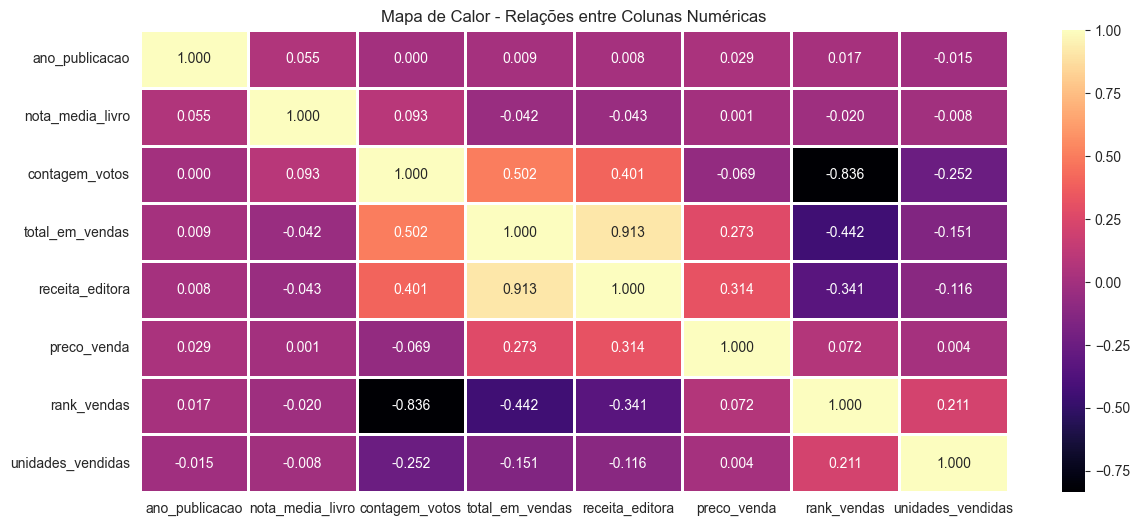

In [26]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.3f', linewidths=1)
plt.title("Mapa de Calor - Relações entre Colunas Numéricas")
plt.show()

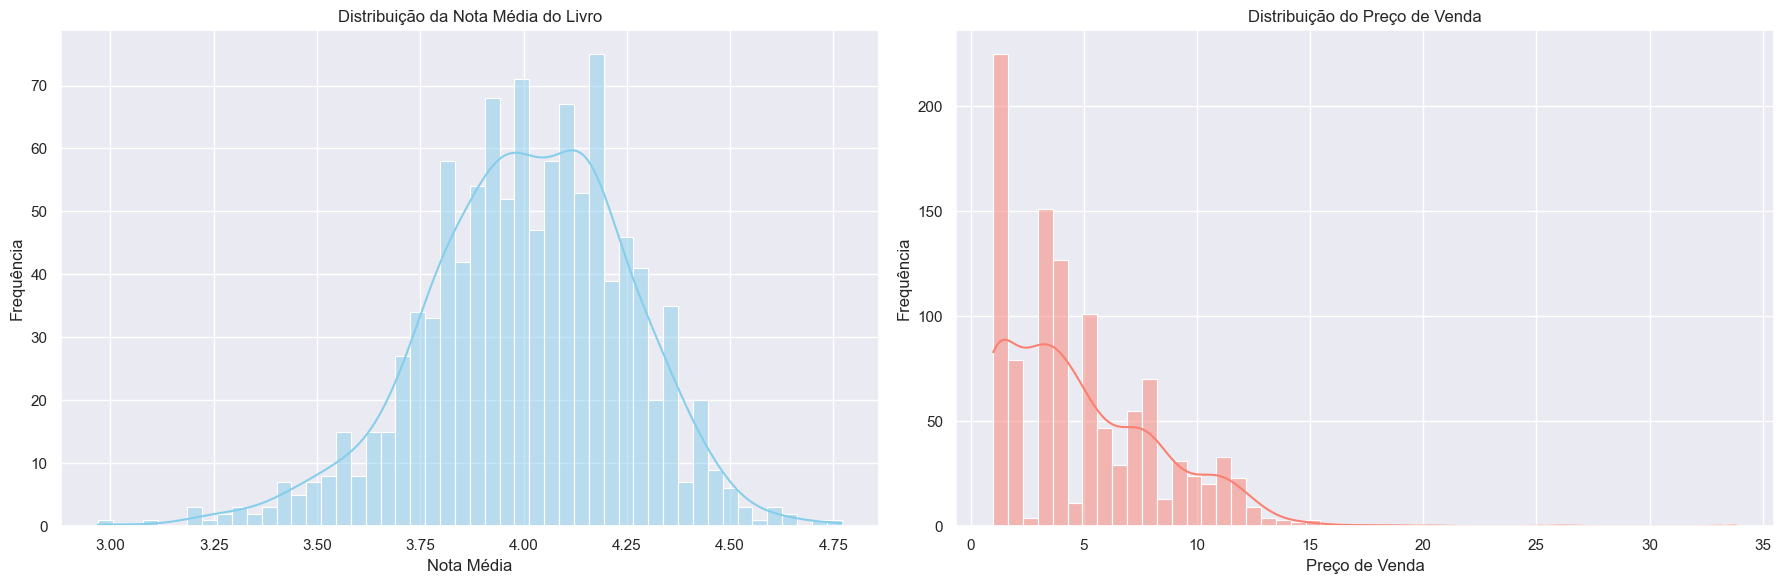

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=df, x='nota_media_livro', bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribuição da Nota Média do Livro')
axes[0].set_xlabel('Nota Média')
axes[0].set_ylabel('Frequência')

sns.histplot(data=df, x='preco_venda', bins=50, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribuição do Preço de Venda')
axes[1].set_xlabel('Preço de Venda')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [12]:
data_linguagem = df['linguagem'].value_counts()
data_experiencia_autor = df['experiencia_autor'].value_counts()
data_genero = df['genero'].value_counts()
data_editora = df['editora'].value_counts()

fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Linguagem do Livro', 'Experiência do Autor', 'Gênero', 'Editora'])

fig.add_trace(go.Bar(x=data_linguagem.index, y=data_linguagem.values, text=data_linguagem.values, textposition='auto', name='linguagem'), row=1, col=1)
fig.add_trace(go.Bar(x=data_experiencia_autor.index, y=data_experiencia_autor.values, text=data_experiencia_autor.values, textposition='auto', name='experiencia_autor'), 
              row=1, col=2)
fig.add_trace(go.Bar(x=data_genero.index, y=data_genero.values, text=data_genero.values, textposition='auto', name='genero'), row=2, col=1)
fig.add_trace(go.Bar(x=data_editora.index, y=data_editora.values, text=data_editora.values, textposition='auto', name='editora'), row=2, col=2)

fig.update_layout(height=850, width=1780, title_text="Gráficos de Barras para Distribuição de Valores de Variáveis Categóricas")
fig.show()

In [13]:
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Contagem de Votos', 'Total em Vendas', 'Receitas de Editoras', 'Unidades Vendidas'])

fig.add_trace(go.Box(x=df['contagem_votos'], name='contagem_votos'), row=1, col=1)
fig.add_trace(go.Box(x=df['total_em_vendas'], name='total_em_vendas'), row=1, col=2)
fig.add_trace(go.Box(x=df['receita_editora'], name='receita_editora'), row=2, col=1)
fig.add_trace(go.Box(x=df['unidades_vendidas'], name='unidades_vendidas'), row=2, col=2)

fig.update_layout(height=800, width=1780, title_text="Distribuições de Colunas Numéricas em Boxplot")
fig.show()

##### Resoluções

###### Quais são os gêneros mais populares em termos de vendas?

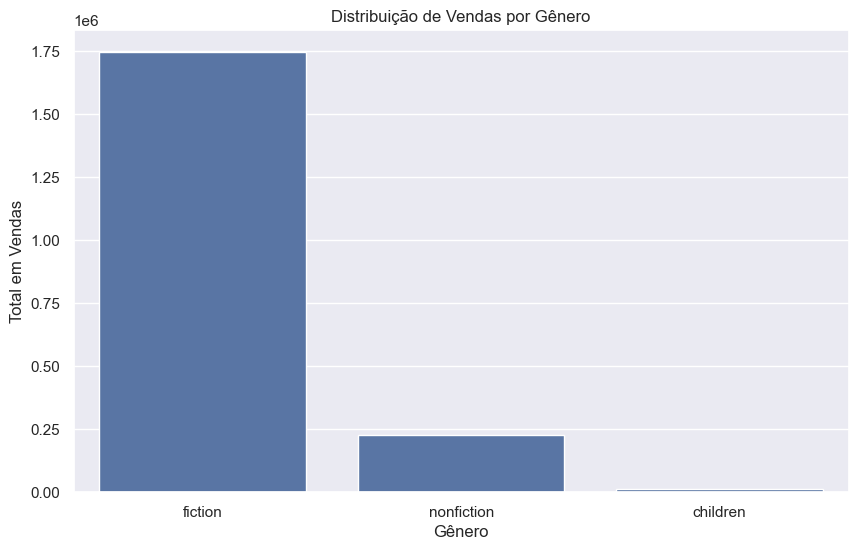

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genero', y='total_em_vendas', data=df, estimator=sum, errorbar=None)
plt.title('Distribuição de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total em Vendas')
plt.show()

###### Existe alguma correlação entre a nota média do livro e o preço de venda?

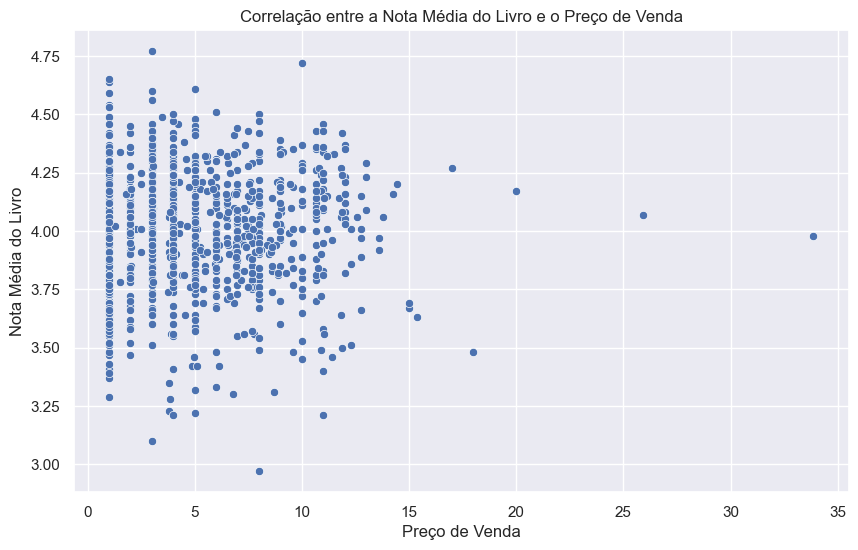

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='preco_venda', y='nota_media_livro', data=df)
plt.title('Correlação entre a Nota Média do Livro e o Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Nota Média do Livro')
plt.show()

###### Qual é a distribuição das vendas por editora?

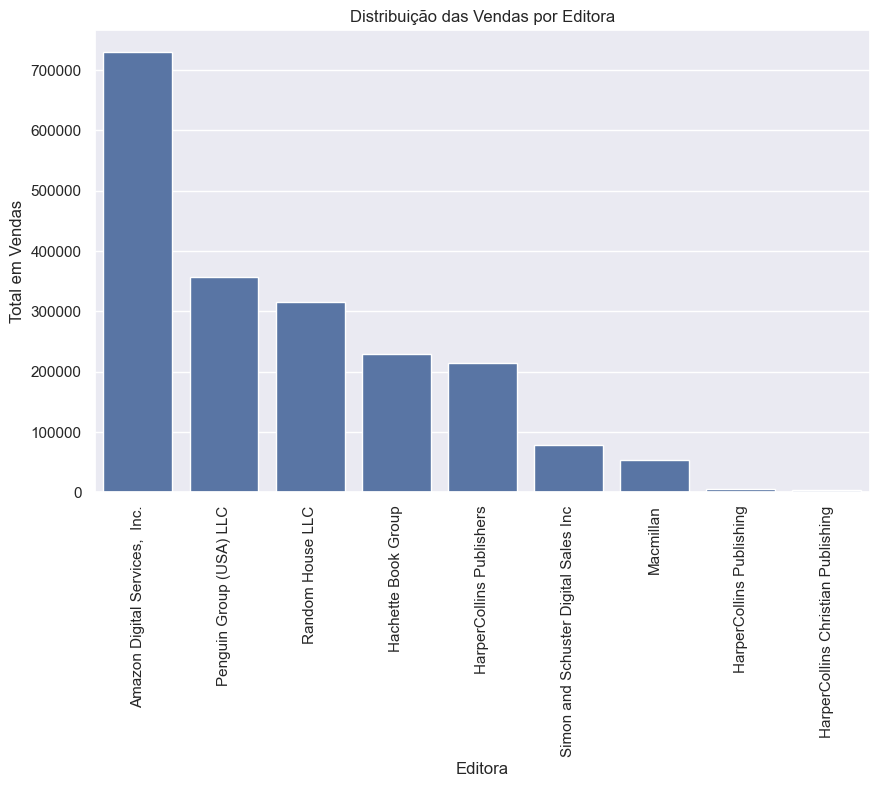

In [52]:
vendas_editora = df.groupby('editora')['total_em_vendas'].sum().reset_index()

vendas_editora = vendas_editora.sort_values(by='total_em_vendas', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='editora', y='total_em_vendas', data=vendas_editora)
plt.title('Distribuição das Vendas por Editora')
plt.xlabel('Editora')
plt.ylabel('Total em Vendas')
plt.xticks(rotation=90)
plt.show()

###### Há alguma tendência entre a experiência do autor e a nota média do livro?

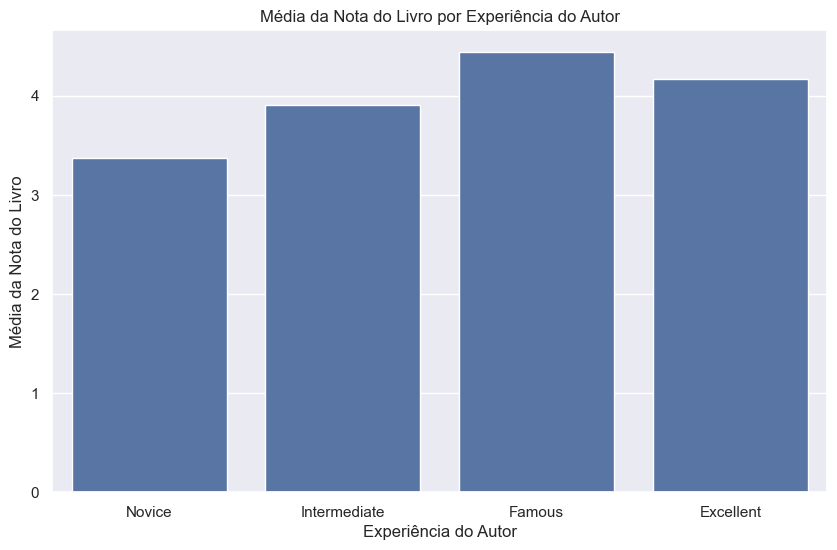

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='experiencia_autor', y='nota_media_livro', data=df, estimator='mean', errorbar=None)
plt.title('Média da Nota do Livro por Experiência do Autor')
plt.xlabel('Experiência do Autor')
plt.ylabel('Média da Nota do Livro')
plt.show()

###### Qual é a relação entre a contagem de votos e a nota média do livro?

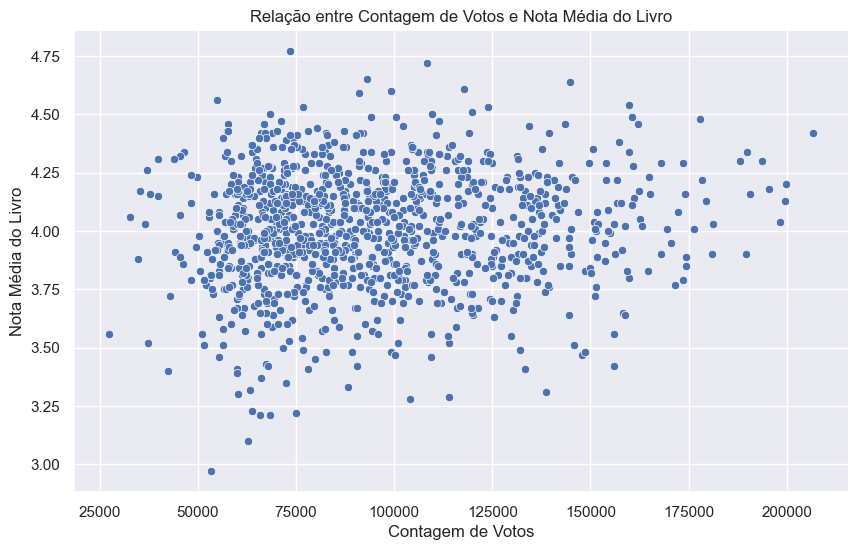

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='contagem_votos', y='nota_media_livro', data=df)
plt.title('Relação entre Contagem de Votos e Nota Média do Livro')
plt.xlabel('Contagem de Votos')
plt.ylabel('Nota Média do Livro')
plt.show()

###### Como as vendas se comparam entre diferentes idiomas?

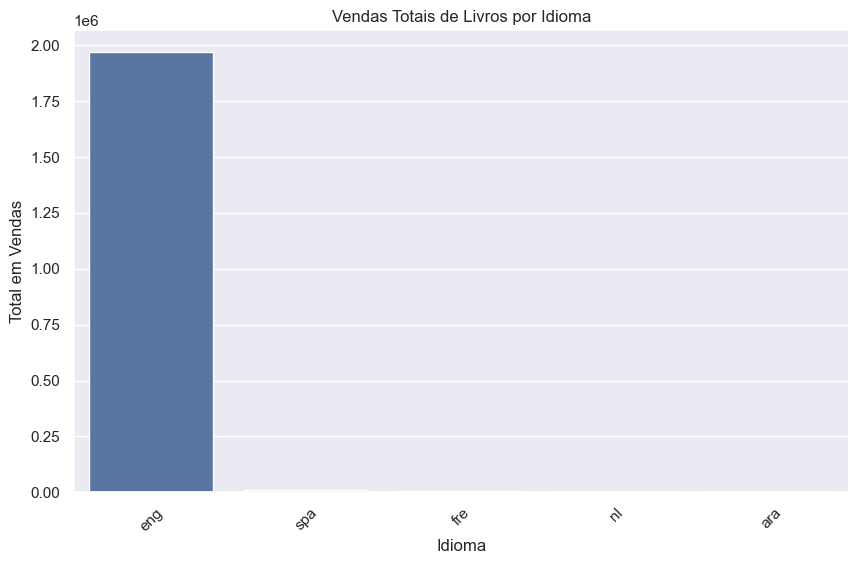

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='linguagem', y='total_em_vendas', data=df, estimator=sum, errorbar=None)
plt.title('Vendas Totais de Livros por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Total em Vendas')
plt.xticks(rotation=45)
plt.show()

###### Qual é a relação entre a classificação de vendas e a nota média do livro?

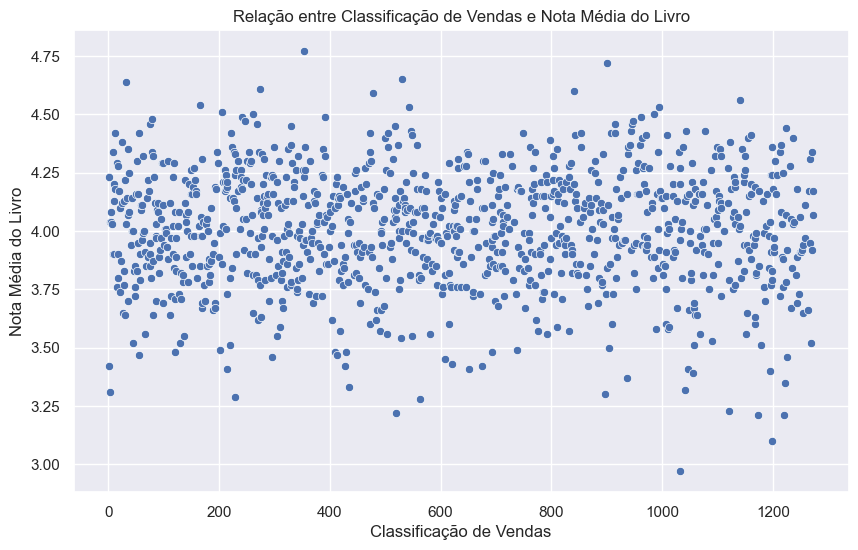

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rank_vendas', y='nota_media_livro', data=df)
plt.title('Relação entre Classificação de Vendas e Nota Média do Livro')
plt.xlabel('Classificação de Vendas')
plt.ylabel('Nota Média do Livro')
plt.show()